# Perkenalan
1. Latar belakang memilih kasus: Harga transportasi sangat bervariatif tergantung beberapa faktor, seperti jarak, jenis transportasi, tipe transportasi, tujuan, dan lain sebagainya. Untuk itu, perlu dilakukan permodelan untuk memprediksi hubungan linear antara variabel-variabel tersebut dan mencoba memprediksi hasilnya berdasarkan model yang diperoleh
2. Data yang digunakan: rideshare_kaggle.csv
3. Objective yang akan dicapai: model prediksi hubungan linear antara variabel-variabel dalam data dengan harga

# Import Pustaka yang Dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import math
import statistics
import scipy.stats
from scipy import stats

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Dataset/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [ ]:
df.shape

(693071, 57)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

# Data Cleaning

a. Mengatasi missing values

In [ ]:
# mencari missing value
df.isnull().sum().sum()

55095

In [ ]:
# menghapus missing values
df.dropna(axis=0,inplace=True)

In [ ]:
# mengecek jumlah missing values setelah dihapus
df.isnull().sum().sum()

0

In [ ]:
df.shape

(637976, 57)

In [ ]:
df = df.drop(['id', 'datetime', 'timezone', 'timestamp', 'long_summary', 'visibility.1', 'temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
                'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
                'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
                'precipIntensityMax'], axis=1)

In [ ]:
df.shape

(637976, 26)

In [ ]:
df = df.drop(['hour', 'day', 'month', 'source', 'destination', 'product_id', 'latitude', 'longitude', 'short_summary', 'windGustTime', 'temperatureLowTime', 'apparentTemperatureHighTime','apparentTemperatureLowTime', 'icon', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime','apparentTemperatureMinTime', 'apparentTemperatureMaxTime'   ], axis=1)

In [ ]:
df.shape

(637976, 5)

In [ ]:
df.columns

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')

b. Mengatasi outlier

In [ ]:
Qp12 = df['price'].quantile(0.25)
Qp32 = df['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [ ]:
df[df['price']>(Qp32+(1.5*IQRp))]

,cab_type,name,price,distance,surge_multiplier
706,Lyft,Lux Black,52.50,3.25,2.00
707,Lyft,Lux Black XL,67.50,3.25,2.00
769,Lyft,Lux Black XL,45.50,4.76,1.00
1094,Lyft,Lux Black XL,45.50,4.31,1.00
1318,Lyft,Lux Black XL,45.50,5.33,1.00
1321,Lyft,Lux Black XL,45.50,4.50,1.00
1333,Lyft,Lux Black XL,45.50,0.46,1.75
1762,Lyft,Lux Black XL,47.50,5.32,1.00
1936,Lyft,Lux Black XL,45.50,4.35,1.00
2043,Lyft,Lux Black XL,52.50,2.81,1.50


In [ ]:
df[df['price']<(Qp12-(1.5*IQRp))]

,cab_type,name,price,distance,surge_multiplier


# Eksplorasi Data

In [ ]:
column_names = df.columns
print(column_names)

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')


In [ ]:
import pandas as pd
import plotly.express as px

def plot_bar(groupby_column):
    df1 = df.groupby(groupby_column).size().reset_index(name="counts")
    fig = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    fig.show()
plot_bar('distance')


 Distance (jarak) yang paling banyak ditempuh orang yaitu 2.66 (8010 orang)

In [ ]:
plot_bar('name')

Jenis produk yang banyak digunakan adalah jenis Black SUV dan WAV

Grouping data rata-rata harga (price) berdasarkan cab type dan destination

In [ ]:
# grouping data rata-rata price berdasarkan variabel cab_type dan destination
group_data=df.groupby([ 'cab_type', 'name'])['price'].mean()
group_data

cab_type  name        
Lyft      Lux             17.771240
          Lux Black       23.062468
          Lux Black XL    32.324086
          Lyft             9.610885
          Lyft XL         15.309363
          Shared           6.029893
Uber      Black           20.523786
          Black SUV       30.286763
          UberPool         8.752500
          UberX            9.765074
          UberXL          15.678144
          WAV              9.765019
Name: price, dtype: float64

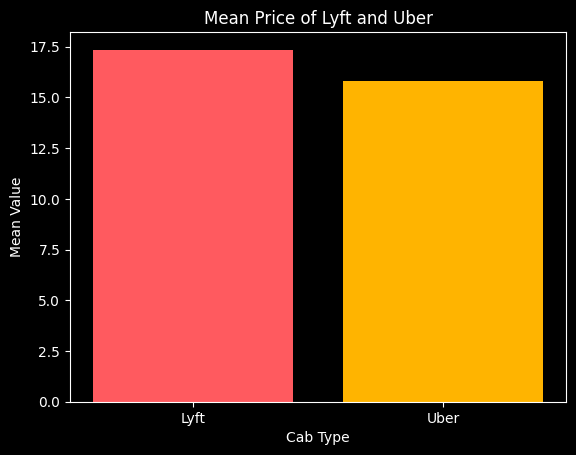

In [ ]:
group_data_lyft = group_data[group_data.index.get_level_values('cab_type') == 'Lyft'].mean()
group_data_uber = group_data[group_data.index.get_level_values('cab_type') == 'Uber'].mean()

categories = ['Lyft', 'Uber']
mean_values = [group_data_lyft, group_data_uber]

# menentukan warna tiap kategori
colors = ['#FF5A5F', '#FFB400']

# membuat bar plot
plt.bar(categories, mean_values, color=colors)

# menambahkan label dan title
plt.xlabel('Cab Type')
plt.ylabel('Mean Value')
plt.title('Mean Price of Lyft and Uber')

# menampilkan bar plot
plt.show()

Berdasarkan bar plot diatas, rata-rata harga lyft lebih mahal dibandingkan uber

Jumlah pengguna lyft dan uber

In [ ]:
cab_type = df['cab_type']
df_cab_type = pd.DataFrame(cab_type)

# Menghitung jumlah masing-masing cab_type
cab_type_counts = df['cab_type'].value_counts()

# Menampilkan hasil
print(cab_type_counts)

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64


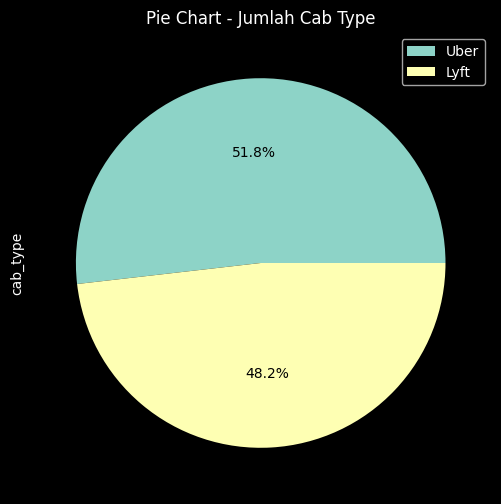

In [ ]:
# Membuat pie chart
cab_type_counts.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', textprops={'color': 'black'})

# Menambahkan judul
plt.title('Pie Chart - Jumlah Cab Type')

# Menambahkan legenda
plt.legend(cab_type_counts.index)

# Menampilkan pie chart
plt.show()

Pengguna uber (51,8%) lebih banyak dibandingkan pengguna lyft (48,2%)

Mean, median, modus, range, variation, standard variation dari variabel price

In [ ]:
# mencari mean, median, dan modus dari variable price
mean_price=np.mean(df['price'])
median_price=np.median(df['price'])
mode_price = pd.Series(df['price']).mode()

# menampilkan hasil
print(mean_price, median_price, mode_price)

16.545125490614065 13.5 0    7.0
Name: price, dtype: float64


Mean atau rata-rata variabel price sebesar 16,54 dengan median dan modusnya sebesar 13,50 dan 7,0

In [ ]:
# mencari range, variation, dan standar deviation
price_max=pd.Series(df['price']).max()
price_min=pd.Series(df['price']).min()
price_range=price_max-price_min
price_var=np.var(df['price'])
price_stdev=np.std(df['price'])
# menampilkan hasil
print(price_range, price_var, price_stdev)

95.0 86.94352667428433 9.324351273642812


Range: 95
Variation: 86,94
Standar deviation: 9,32

# Data Preprocessing

 pembagian data menjadi train-dev-test, transformasi data
 (normalisasi, encoding, dll.)

a. Encoding Data (One Hot Encoding)

In [ ]:
category_col = df.select_dtypes(include=['object','category']).columns.tolist()
for column in df[category_col]:
    print(f'{column} : {df[column].unique()}')
    print()

cab_type : ['Lyft' 'Uber']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']



In [ ]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])

    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)

    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)

    if keep_first == False:
        new_data=new_data.iloc[:,1:]

    return new_data

In [ ]:
new_df_onehot=df.copy()
for col in new_df_onehot.select_dtypes(include='O').columns:
    new_df_onehot=one_hot_encoder(new_df_onehot,col)

new_df_onehot.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


Membagi data menjadi x dan y (train dan test)

In [ ]:
from sklearn.model_selection import train_test_split
X = new_df_onehot.drop(columns=['price'],axis=1).values
y = new_df_onehot['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Pendefisian Model


Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.
 Akan lebih bagus jika didahului dengan penjelasan mengapa memilih
 arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter,
 dan hal lain yang berkaitan.
 .............................

In [ ]:
new_df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              637976 non-null  float64
 1   distance           637976 non-null  float64
 2   surge_multiplier   637976 non-null  float64
 3   cab_type_Lyft      637976 non-null  uint8  
 4   cab_type_Uber      637976 non-null  uint8  
 5   name_Black         637976 non-null  uint8  
 6   name_Black SUV     637976 non-null  uint8  
 7   name_Lux           637976 non-null  uint8  
 8   name_Lux Black     637976 non-null  uint8  
 9   name_Lux Black XL  637976 non-null  uint8  
 10  name_Lyft          637976 non-null  uint8  
 11  name_Lyft XL       637976 non-null  uint8  
 12  name_Shared        637976 non-null  uint8  
 13  name_UberPool      637976 non-null  uint8  
 14  name_UberX         637976 non-null  uint8  
 15  name_UberXL        637976 non-null  uint8  
 16  na

# Pelatihan Model

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
# Melatih model menggunakan data latih
model = reg.fit(X_train,y_train)

# Memprediksi nilai y berdasarkan data yang sudah dilatih
y_pred=model.predict(X_test)

In [ ]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -8.161129251234659
slope: [  2.79762957  18.32631604   0.42509363  -0.42509363   4.66115215
  14.41904869   0.38966987   5.66296051  14.97195657  -7.80948726
  -2.11014966 -10.67985642  -7.10971329  -6.09869798  -0.18512067
  -6.11176252]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.928107485093996

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

6.2014837641395175
2.4902778487830464


Model regresi yang dihasilkan memiliki nilai R square 92,81% yang menunjukkan bahwa 92,81 keragaman data dapat dijelaskan oleh model regresi tersebut. Pengukuran terhadap kesalahan prediksi dari model dilakukan menggunakan MSE dan RMSE yang menghasilkan nilai 6,20 dan 2,49. Nilai tersebut menunjukkan kesalahan yang kecil. Hasil analisis R square, MSE, dan RMSE menunjukkan bahwa model regresi tersebut baik digunakan dalam memprediksi target model

In [ ]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 6.257e+05
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:29:16   Log-Likelihood:            -1.4935e+06
No. Observations:              637976   AIC:                         2.987e+06
Df Residuals:                  637962   BIC:                         2.987e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1568      0.022   -235.432      0.0

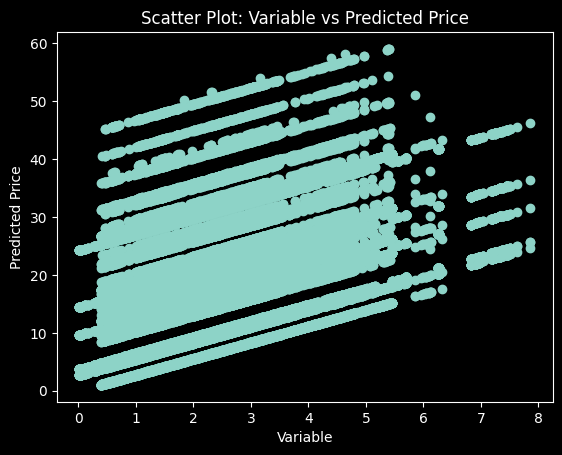

In [ ]:
# Memprediksi respon dengan model regresi linear
y_prediksi = model.predict(X)

# Scatter plot
plt.scatter(X[:, 0], y_prediksi)  # Menggunakan nilai dari kolom pertama dari X
plt.xlabel('Variable')
plt.ylabel('Predicted Price')
plt.title('Scatter Plot: Variable vs Predicted Price')
plt.show()

Setiap variabel independen (x) membentuk garis lurus terhadap variabel dependennya (y)

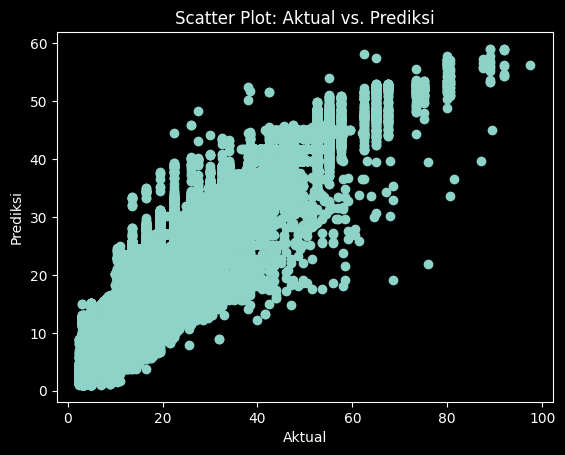

In [ ]:
plt.scatter(y, y_prediksi)
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Scatter Plot: Aktual vs. Prediksi')
plt.show()

# Model Inference

Model yang sudah dilatih digunakan pada data lain

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df_baru=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv')
df_baru.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_new=df_baru.drop(['id', 'date', 'lat', 'long', 'zipcode', 'sqft_living15','sqft_lot15'], axis=1)
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0


In [ ]:
df_new.isnull().sum().sum()

0

Melihat korelasi antarvariabel

<Axes: >

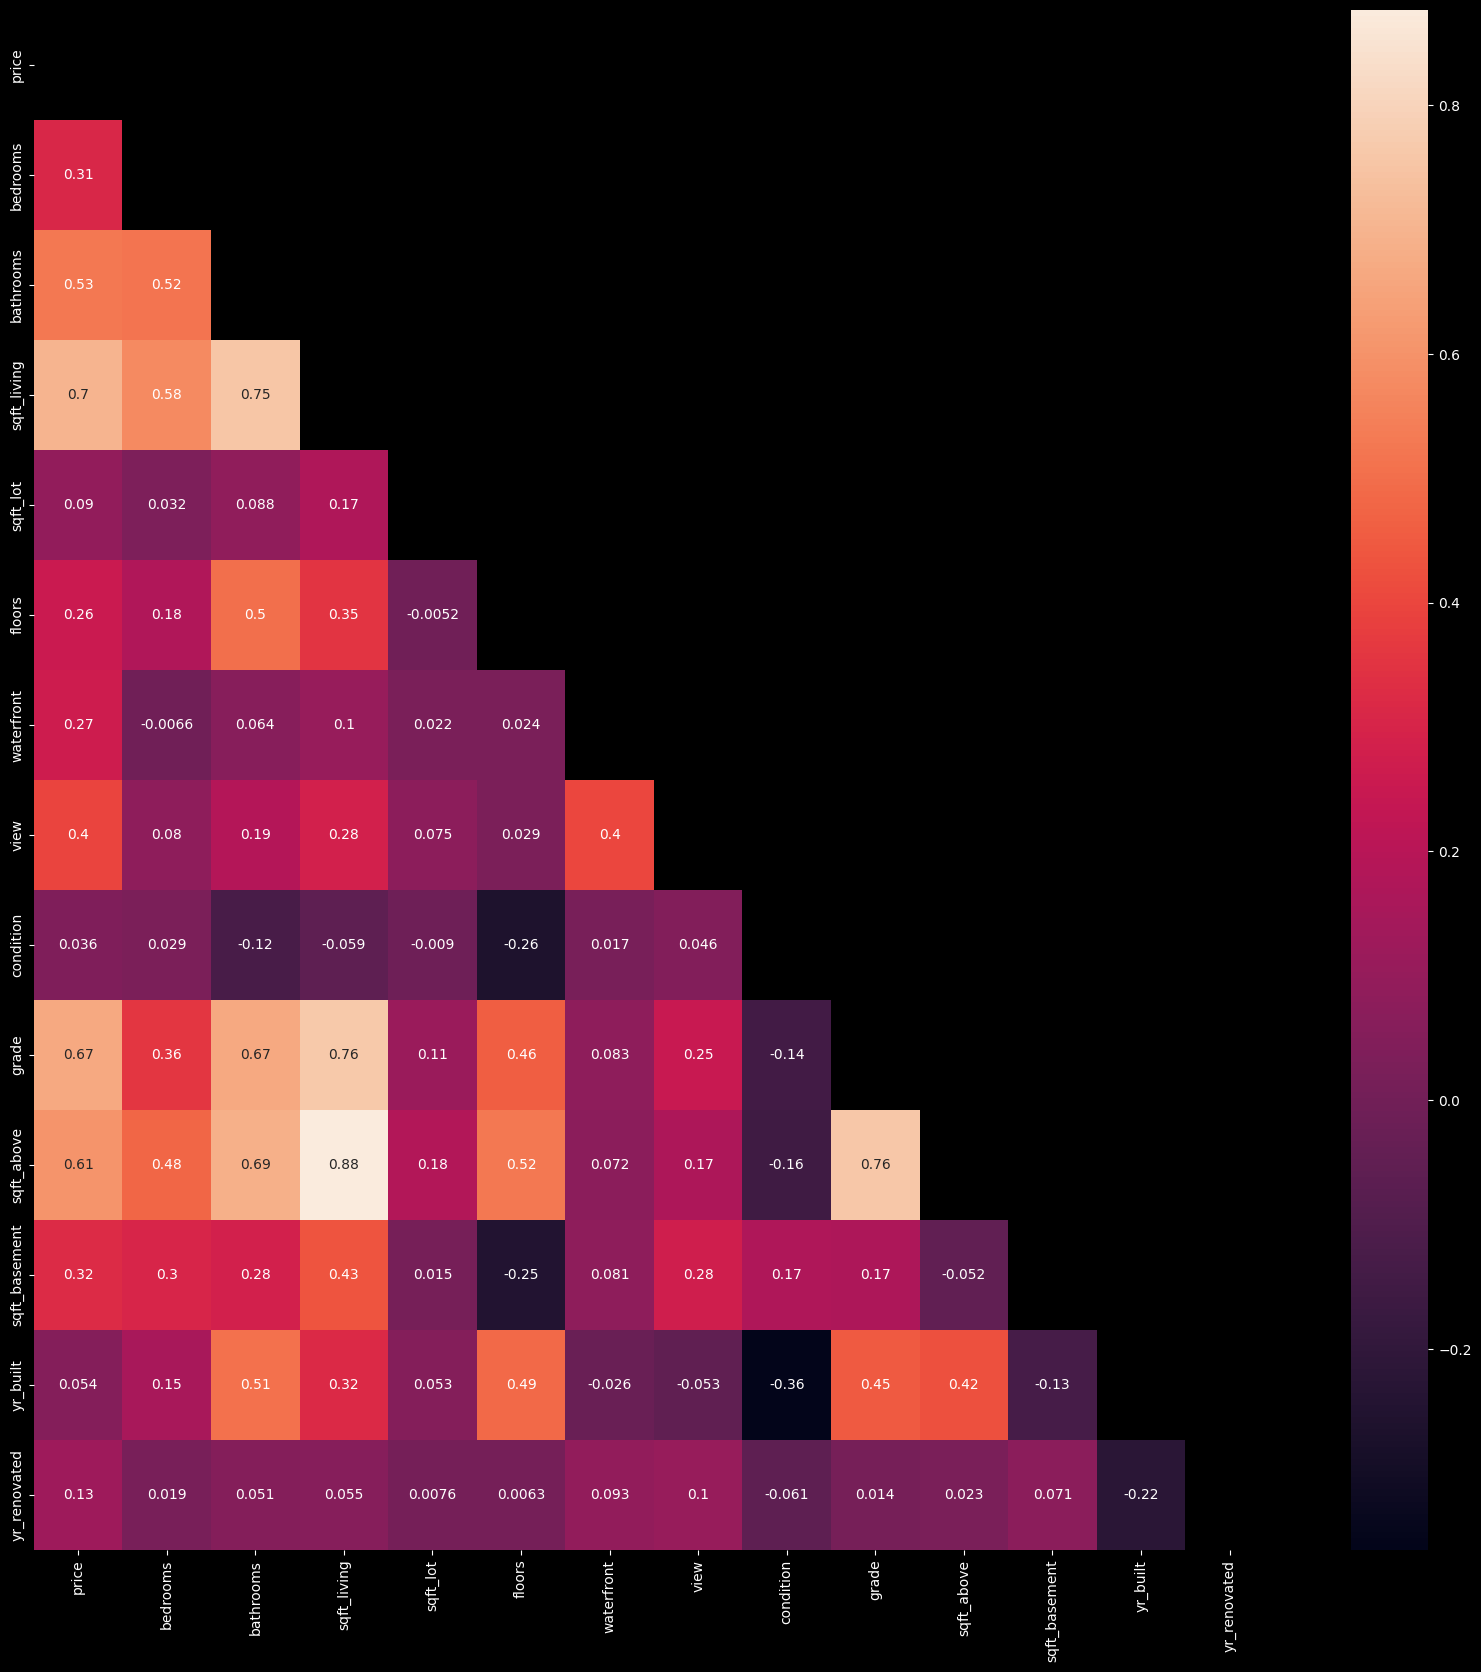

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(round(df_new.corr(), 4),annot=True, mask=np.triu(df_new.corr()))

Menghapus variable yang memiliki korelasi yang sedikit terhadap variabel harga (price) yaitu sqft_lot, yr_renovated, yr_built, condition, floors, waterfront

In [ ]:
df_new.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

In [ ]:
df_new=df_baru.drop(['id', 'date', 'yr_built', 'yr_renovated', 'floors', 'waterfront', 'condition','sqft_lot' ], axis=1)
df_new.head()

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,0,7,1180,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,0,7,2170,400,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,0,6,770,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,0,7,1050,910,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,0,8,1680,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_new.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
Qp12n = df_new['price'].quantile(0.25)
Qp32n = df_new['price'].quantile(0.75)
IQRpn = Qp32n-Qp12n

In [ ]:
df_new[df_new['price']>(Qp32n+(1.5*IQRpn))]

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
5,1225000.0,4,4.50,5420,0,11,3890,1530,98053,47.6561,-122.005,4760,101930
21,2000000.0,3,2.75,3050,4,9,2330,720,98040,47.5316,-122.233,4110,20336
49,1350000.0,3,2.50,2753,2,9,2165,588,98070,47.4041,-122.451,2680,72513
69,1325000.0,5,2.25,3200,0,8,1600,1600,98004,47.6303,-122.215,3390,20158
125,1450000.0,4,2.75,2750,0,8,1980,770,98004,47.6141,-122.212,3060,11275
153,2250000.0,4,3.25,5180,3,12,3540,1640,98006,47.5620,-122.162,3160,9750
216,1505000.0,5,3.00,3300,3,9,1870,1430,98040,47.5673,-122.210,3836,20953
246,2400000.0,4,2.50,3650,4,9,1830,1820,98074,47.6338,-122.072,3120,18841
269,2900000.0,4,3.25,5050,2,11,4750,300,98004,47.6312,-122.223,3890,20060
270,1365000.0,4,4.75,5310,0,11,5310,0,98077,47.7285,-122.042,4180,47443


In [ ]:
Xn = df_new.drop(columns=['price'],axis=1).values
yn = df_new['price'].values

Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.3, random_state=0)

In [ ]:
# Melatih model menggunakan data latih
modeln = reg.fit(Xn_train,yn_train)

# Memprediksi nilai y berdasarkan data yang sudah dilatih
yn_pred=model.predict(Xn_test)

print(yn_pred)

[ 489682.92272304 1434947.72916118  497123.98658393 ...  315120.91850213
  273911.2139446   144330.93779644]


In [ ]:
# Mengecek R square model dari data baru
r2_score(yn_test, yn_pred)

0.6427698844010552

Dalam konteks Anda, jika R² memiliki nilai 0.64, itu berarti model regresi yang digunakan dapat menjelaskan sekitar 64% variasi dari data yang diamati. Sisanya, yaitu sekitar 36%, mungkin disebabkan oleh faktor-faktor lain yang tidak dimasukkan ke dalam model atau variasi alami yang tidak dapat dijelaskan oleh variabel independen yang digunakan dalam model tersebut. Meskipun 64% bukanlah nilai yang sempurna, dalam banyak kasus, R² sebesar 0.64 dianggap sebagai indikator yang baik bahwa model regresi tersebut memberikan penjelasan yang layak tentang hubungan antara variabel dependen dan independen.

# Pengambilan Keputusan

1. Hasil model linear regression data rideshare_kaggle.csv menunjukkan bahwa harga transportasi (price) memiliki hubungan linear dengan variabel berupa distance, surge multiplier, cab type (Lyft, Uber), dan name (Black, Black SUV, Lux, Lux Black, Lux Black XL, Lyft, Lyft XL, Shared, UberPool, UberX, UberX, UberXL, WAV).

2. Hasil model linear data rideshare_kaggle.csv memiliki intercept-8.16 dan slope: [2.79762957  18.32631604   0.42509363  -0.42509363   4.66115215
  14.41904869   0.38966987   5.66296051  14.97195657  -7.80948726
  -2.11014966 -10.67985642  -7.10971329  -6.09869798  -0.18512067
  -6.11176252] yang menunjukkan bahwa ketika semua variabel independen x memiliki nilai X=0 menunjukkan nilai respon memiliki nilai -8.15 dan demikian jika xi naik sebesar 1 maka nilai respon naik sebesar nilai slope variabel xi.

3. Hasil model linear regression memiliki nilai koefisien determinasi atau R square sebesar 92,81 % yang menunjukkan bahwa  model regresi memiliki kemampuan yang sangat baik untuk menjelaskan hubungan antara variabel dependen dan variabel independen yang digunakan dalam model. R square sebesar 92,81% berarti bahwa ebagian besar variasi dalam data (92,81%) dapat dijelaskan oleh variabel independen yang digunakan dalam model tersebut. Nilai model MSE dan RMSE dari linear regression menghasilkan nilai 6,20 dan 2,49 menunjukkan bahwa nilai tersebut menunjukkan error atau kesalahan atau selisih antara nilai yang diprediksi oleh model dengan nilai aktual dalam data cukup kecil.

4. Hasil model linear regression yang telah dilatih kemudian digunakan untuk data yang lain yang menghasilkan nilai R square sebesar 64%, itu berarti model regresi yang digunakan dapat menjelaskan sekitar 64% variasi dari data yang diamati.

5. Kesimpulannya bahwa model yang dihasilkan memberikan penjelasan yang layak tentang hubungan antara variabel dependen dan independen dengan nilai R square yang tinggi
